## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
tt=pd.read_excel("titanic.xlsx")
tt

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [3]:
# How many columns are in this dataset?
# How many rows are in this dataset?
tt.info()
# There are 14 columns 
# There are 1309 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
# What types of data are in each column? Does this make sense with that you know about that column?

        # >>> There are 3 types of data : integers, floats, and objects
        # >>> The Body number should not be a float
        

In [5]:
# Which variables are numeric? 
        #>> age, sibsp, parch, fare, 
    
# Which variables are categorical? 
        #>>> pclass, survived, sex, cabin, embarked , boat, home destination
    
# What other variables are left outside of these two groups?
        #>>> name, ticket


In [6]:
# Which variable could be considered a 'dependent' variable?
        #>>> Fare


### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [7]:
# Is there any missing data?
tt.isnull().sum()
        #>> There are several missing data


# Which columns have any missing data?
        #>>> age, fare, cabin, embarked, boat, body, home.dest
    
# Which column has the most missing information? Which column has the least?
        #>>> the most : body
        #>>> the least : fare


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [8]:
# Remove the columns with excessive missing data (any column missing greater than 500 rows)
tt.drop(columns=["home.dest", "body", "boat", "cabin"], inplace=True)

tt

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


In [9]:
# When there is very little missing data, we can make replacements. 
   # Replace the missing data for the "embarked" column with the most common embarkation point
tt["embarked"].value_counts()

tt["embarked"].fillna("S", inplace=True)

In [10]:
# Replace the missing data in "fare" with the average fare of the entire sample. 
tt["fare"].fillna(tt["fare"].mean(), inplace=True)

In [11]:
# Remove the rows in the dataset that has missing "age" data.

tt.dropna(subset=["age"], inplace = True)


In [12]:
# Recheck is there is any data missing in the dataset. 
tt.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [13]:
# Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, 
        # create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)

        # pclass = passenger class; 1 = first class, 2 = second class, 3 = third class

        # survived = passenger survival; 1 = survived, 0 = did not survive
   
         # embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton


In [14]:
tt["pclass"].replace([1,2,3], ["first class", "second class", "third class"], inplace=True)
tt["survived"].replace([0,1], ["did not survive", "survived"], inplace=True)
tt["embarked"].replace(["C", "Q", "S"], ["Cherbourg", "Queenstown", "Southampton"], inplace=True)

In [15]:
tt.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,first class,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton
1,first class,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton
2,first class,did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton
3,first class,did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton
4,first class,did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton


In [16]:
# Create a new column called "Titanic Passenger" and make all values 1
tt["Titanic Passenger"]=1

In [17]:
# Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
tt["Family Size"]=(tt["sibsp"]+tt["parch"])

In [18]:
tt.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size
0,first class,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0
1,first class,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3
2,first class,did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3
3,first class,did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3
4,first class,did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3


In [19]:
# Create a column called "Travel Alone" - 
   # this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 

tt["Travel Alone"]=np.where((tt["Family Size"]==0),1,0)

In [20]:
tt.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone
0,first class,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,1
1,first class,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,0
2,first class,did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,0
3,first class,did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,0
4,first class,did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,0


In [21]:
# Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is  
   # less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
    
tt["Has Caregiver"]=np.where(((tt["age"]<13)&(tt["Travel Alone"]==1)), 1,0)

In [22]:
tt.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver
0,first class,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,1,0
1,first class,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,0,0
2,first class,did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,0,0


In [23]:
# Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise.
tt["Crew"]=np.where((tt["fare"]==0),1,0)
tt.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew
0,first class,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,1,0,0
1,first class,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,0,0,0
2,first class,did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,0,0,0
3,first class,did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,0,0,0
4,first class,did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,0,0,0


In [24]:
# Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). 
    # You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
    

age_bins=[0,2,14,21,60,120]
age_labels=["infant", "child", "teen", "adult", "senior"]

tt["Age Group"] = pd.cut(tt["age"], age_bins, labels = age_labels)

tt.head()
    

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,first class,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,1,0,0,adult
1,first class,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,0,0,0,infant
2,first class,did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,0,0,0,infant
3,first class,did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,0,0,0,adult
4,first class,did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,0,0,0,adult


In [25]:
# After create new columns, replace the basic coding "0/1" with meaningful labels. 

tt["Titanic Passenger"].replace([0,1],["no","yes"], inplace=True)
tt["Has Caregiver"].replace([0,1],["no","yes"], inplace=True)
tt["Travel Alone"].replace([0,1],["no","yes"], inplace=True)
tt["Crew"].replace([0,1],["no","yes"], inplace=True)

tt.head(10)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,first class,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,yes,0,yes,no,no,adult
1,first class,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,yes,3,no,no,no,infant
2,first class,did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,yes,3,no,no,no,infant
3,first class,did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,yes,3,no,no,no,adult
4,first class,did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,yes,3,no,no,no,adult
5,first class,survived,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,Southampton,yes,0,yes,no,no,adult
6,first class,survived,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,Southampton,yes,1,no,no,no,senior
7,first class,did not survive,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,Southampton,yes,0,yes,no,yes,adult
8,first class,survived,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,Southampton,yes,2,no,no,no,adult
9,first class,did not survive,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,Cherbourg,yes,0,yes,no,no,senior


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [26]:
tt["pclass"].value_counts()

third class     501
first class     284
second class    261
Name: pclass, dtype: int64

In [27]:
tt["survived"].value_counts()

did not survive    619
survived           427
Name: survived, dtype: int64

In [28]:
tt["sex"].value_counts()

male      658
female    388
Name: sex, dtype: int64

In [29]:
tt["embarked"].value_counts()

Southampton    784
Cherbourg      212
Queenstown      50
Name: embarked, dtype: int64

In [30]:
tt["Travel Alone"].value_counts()

yes    590
no     456
Name: Travel Alone, dtype: int64

In [31]:
tt["Has Caregiver"].value_counts()

no     1043
yes       3
Name: Has Caregiver, dtype: int64

In [32]:
tt["Crew"].value_counts()

no     1038
yes       8
Name: Crew, dtype: int64

In [33]:
tt["Age Group"].value_counts()

adult     723
teen      183
child      73
infant     34
senior     33
Name: Age Group, dtype: int64

In [34]:

#### NOTE TO MYSELF

pd.crosstab(index=tt["pclass"], columns=[tt["survived"], tt["sex"], tt["embarked"], tt["Travel Alone"], tt["Has Caregiver"]], margins=True)

survived      did not survive                                               \
sex                    female                                         male   
embarked            Cherbourg     Queenstown     Southampton     Cherbourg   
Travel Alone               no yes         no yes          no yes        no   
Has Caregiver              no  no         no  no          no  no        no   
pclass                                                                       
first class                 0   2          0   0           3   0        19   
second class                0   0          0   0           6   5         5   
third class                 4   1          2  11          43  19         7   
All                         4   3          2  11          52  24        31   

survived                          ...   survived                      \
sex                               ...     female                       
embarked              Queenstown  ... Queenstown Southampton           
Travel Alone  yes             no  ...        yes          no yes       
Has Caregiver  no yes         no  ...         no          no  no yes   
pclass                            ...                                  
first class    18   0          1  ...          0          42  21   0   
second class    4   0          0  ...          1          49  30   1   
third class    19   1          6  ...          8          27  19   1   
All            41   1          7  ...          9         118  70   2   

survived                                                 All  
sex                male                                       
embarked      Cherbourg     Queenstown Southampton            
Travel Alone         no yes        yes          no yes        
Has Caregiver        no  no         no          no  no        
pclass                                                        
first class          16  10          0          13  14   284  
second class          1   3          0          12   7   261  
third class           5   6          2          13  33   501  
All                  22  19          2          38  54  1046  

[4 rows x 26 columns]

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [35]:
tt.mean()

age            29.881135
sibsp           0.502868
parch           0.420650
fare           36.682839
Family Size     0.923518
dtype: float64

In [36]:
tt.median()

age            28.0
sibsp           0.0
parch           0.0
fare           15.8
Family Size     0.0
dtype: float64

In [37]:
tt.mode()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,third class,did not survive,"Connolly, Miss. Kate",male,24.0,0.0,0.0,CA 2144,13.0,Southampton,yes,0.0,yes,no,no,adult
1,NaN,NaN,"Kelly, Mr. James",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
tt.std()

age            14.413500
sibsp           0.912167
parch           0.839750
fare           55.705959
Family Size     1.452891
dtype: float64

In [39]:
print((tt["age"].max())-(tt["age"].min()))

79.8333


In [40]:
print((tt["sibsp"].max())-(tt["sibsp"].min()))

8


In [41]:
print((tt["parch"].max())-(tt["parch"].min()))

6


In [42]:
print((tt["fare"].max())-(tt["fare"].min()))

512.3292


In [43]:
print((tt["Family Size"].max())-(tt["Family Size"].min()))

10


### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [44]:
pd.crosstab(index=tt["survived"], columns=tt["pclass"], margins=True)
#The first class has the most survivors, and the theirs class has the least

pclass,first class,second class,third class,All
survived,,,,
did not survive,103,146,370,619
survived,181,115,131,427
All,284,261,501,1046


In [45]:
pd.crosstab(index=tt["survived"], columns=tt["sex"], margins=True)

# There are mor female survivors than male

sex,female,male,All
survived,,,
did not survive,96,523,619
survived,292,135,427
All,388,658,1046


In [46]:
tt["age"].groupby(tt["survived"]).mean()

# In average, the passengers who survived where younger

survived
did not survive    30.545369
survived           28.918228
Name: age, dtype: float64

In [47]:
pd.crosstab(index=tt["survived"], columns=tt["Age Group"], margins=True)

# The majority of survivors within each group were among the infants (62%), followed by childs (55%). the Grou with the least survivors is the senior

Age Group,infant,child,teen,adult,senior,All
survived,,,,,,
did not survive,13,33,119,429,25,619
survived,21,40,64,294,8,427
All,34,73,183,723,33,1046


In [48]:
pd.crosstab(index=tt["survived"], columns=tt["Family Size"], margins=True)

# The majority of survivors within each group were among the falilies of 3 (77% within the group), The least were among the faliles of 7 and 10 people (0%)


Family Size,0,1,2,3,4,5,6,7,10,All
survived,,,,,,,,,,
did not survive,402,93,63,9,11,20,12,8,1,619
survived,188,113,81,30,6,5,4,0,0,427
All,590,206,144,39,17,25,16,8,1,1046


In [49]:
pd.crosstab(index=tt["survived"], columns=tt["Travel Alone"], margins=True)

# The most survivors were not travelling alone.

Travel Alone,no,yes,All
survived,,,
did not survive,217,402,619
survived,239,188,427
All,456,590,1046


In [50]:
pd.crosstab(index=tt["survived"], columns=tt["Crew"], margins=True)

# Only 25% of Crew members survives vs 41% of non-crew passengers

Crew,no,yes,All
survived,,,
did not survive,613,6,619
survived,425,2,427
All,1038,8,1046


In [51]:
pd.crosstab(index=tt["survived"], columns=tt["Has Caregiver"], margins=True)

# Within each group, most of the survivors were among the passengers that had Caregivers.
# The comparison with the passenger without caregivers doesn't seem relevant , because of the overall low number of people

Has Caregiver,no,yes,All
survived,,,
did not survive,618,1,619
survived,425,2,427
All,1043,3,1046


In [52]:
tt["fare"].groupby(tt["survived"]).mean()

# The survivors had paid on average higher fares than the non-survivors

survived
did not survive    25.161913
survived           53.384134
Name: fare, dtype: float64

In [53]:
pd.crosstab(index=tt["survived"], columns=tt["embarked"], margins=True)

embarked,Cherbourg,Queenstown,Southampton,All
survived,,,,
did not survive,80,37,502,619
survived,132,13,282,427
All,212,50,784,1046


In [54]:
tt.corr()

,age,sibsp,parch,fare,Family Size
age,1.000000,-0.243699,-0.150917,0.178229,-0.240230
sibsp,-0.243699,1.000000,0.374456,0.141195,0.844260
parch,-0.150917,0.374456,1.000000,0.216726,0.813080
fare,0.178229,0.141195,0.216726,1.000000,0.213911
Family Size,-0.240230,0.844260,0.813080,0.213911,1.000000


### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

In [55]:
# Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results.

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns


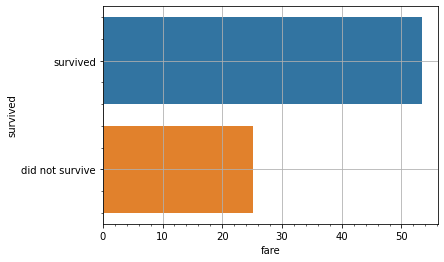

In [56]:
# tt["fare"].groupby(tt["survived"]).mean()

#plt.figure(figsize=(15.8)
sns.barplot(data=tt, x="fare", y="survived", ci=None)   
plt.grid()
plt.minorticks_on()

(array([0, 1]), [Text(0, 0, 'survived'), Text(1, 0, 'did not survive')])

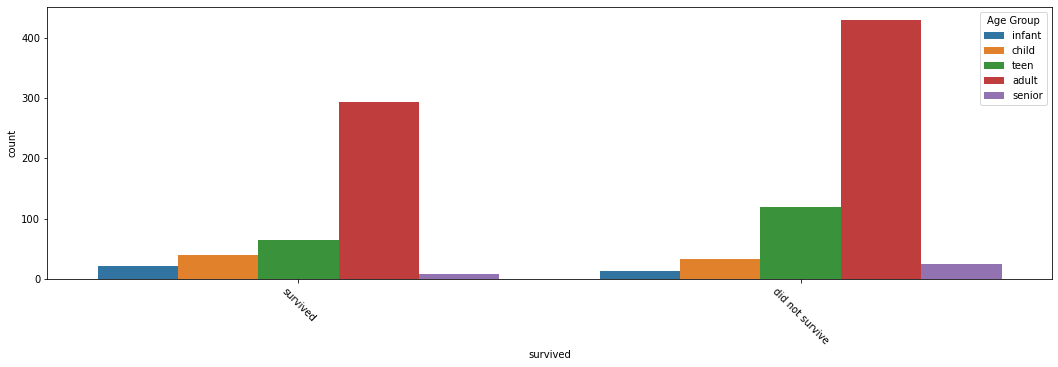

In [62]:
plt.figure(figsize=(18,5))
sns.countplot(data=tt, x="survived", hue="Age Group")
plt.xticks(rotation=-45) 
plt.titles("Frequency of survivors by age group")
#plt.legend()
#plt.show()

Text(0.5, 1.0, 'Frequency of survivors by age group')

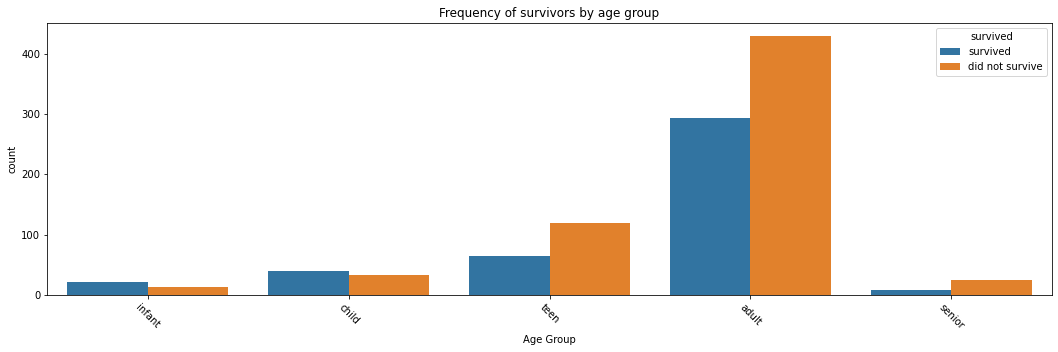

In [64]:
plt.figure(figsize=(18,5))
sns.countplot(data=tt, x="Age Group", hue="survived")
plt.xticks(rotation=-45) 
plt.title("Frequency of survivors by age group")
#plt.legend()
#plt.show()

In [57]:
### NOTE TO MYSELF : make sure to use lower case x and y , to avoid a long error message 

Text(0.5, 1.0, 'Frequency of survivors by passenger class')

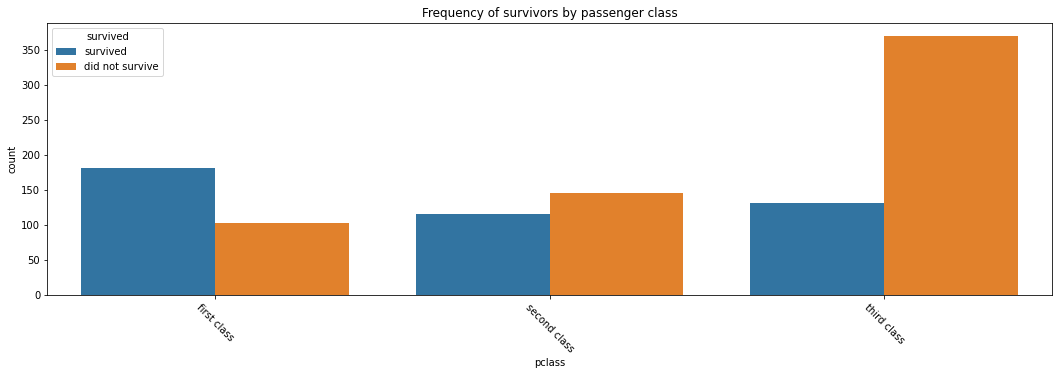

In [65]:
plt.figure(figsize=(18,5))
sns.countplot(data=tt, x="pclass", hue="survived")
plt.xticks(rotation=-45) 
plt.title("Frequency of survivors by passenger class")


Text(0.5, 1.0, 'average age across passenger class')

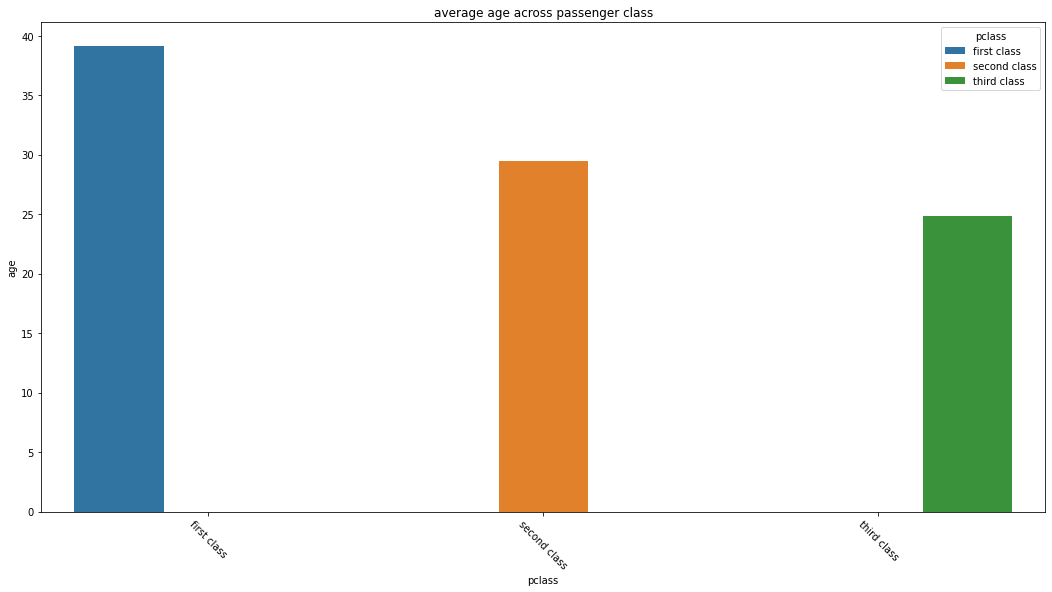

In [69]:
# Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?

plt.figure(figsize=(18,9))
sns.barplot(data = tt, x = "pclass", y = "age", hue = "pclass", ci = None)
plt.xticks(rotation = -45)
plt.title('average age across passenger class')

    #>>> The first class has the oldest passengers

Text(0.5, 1.0, 'average age across passenger class')

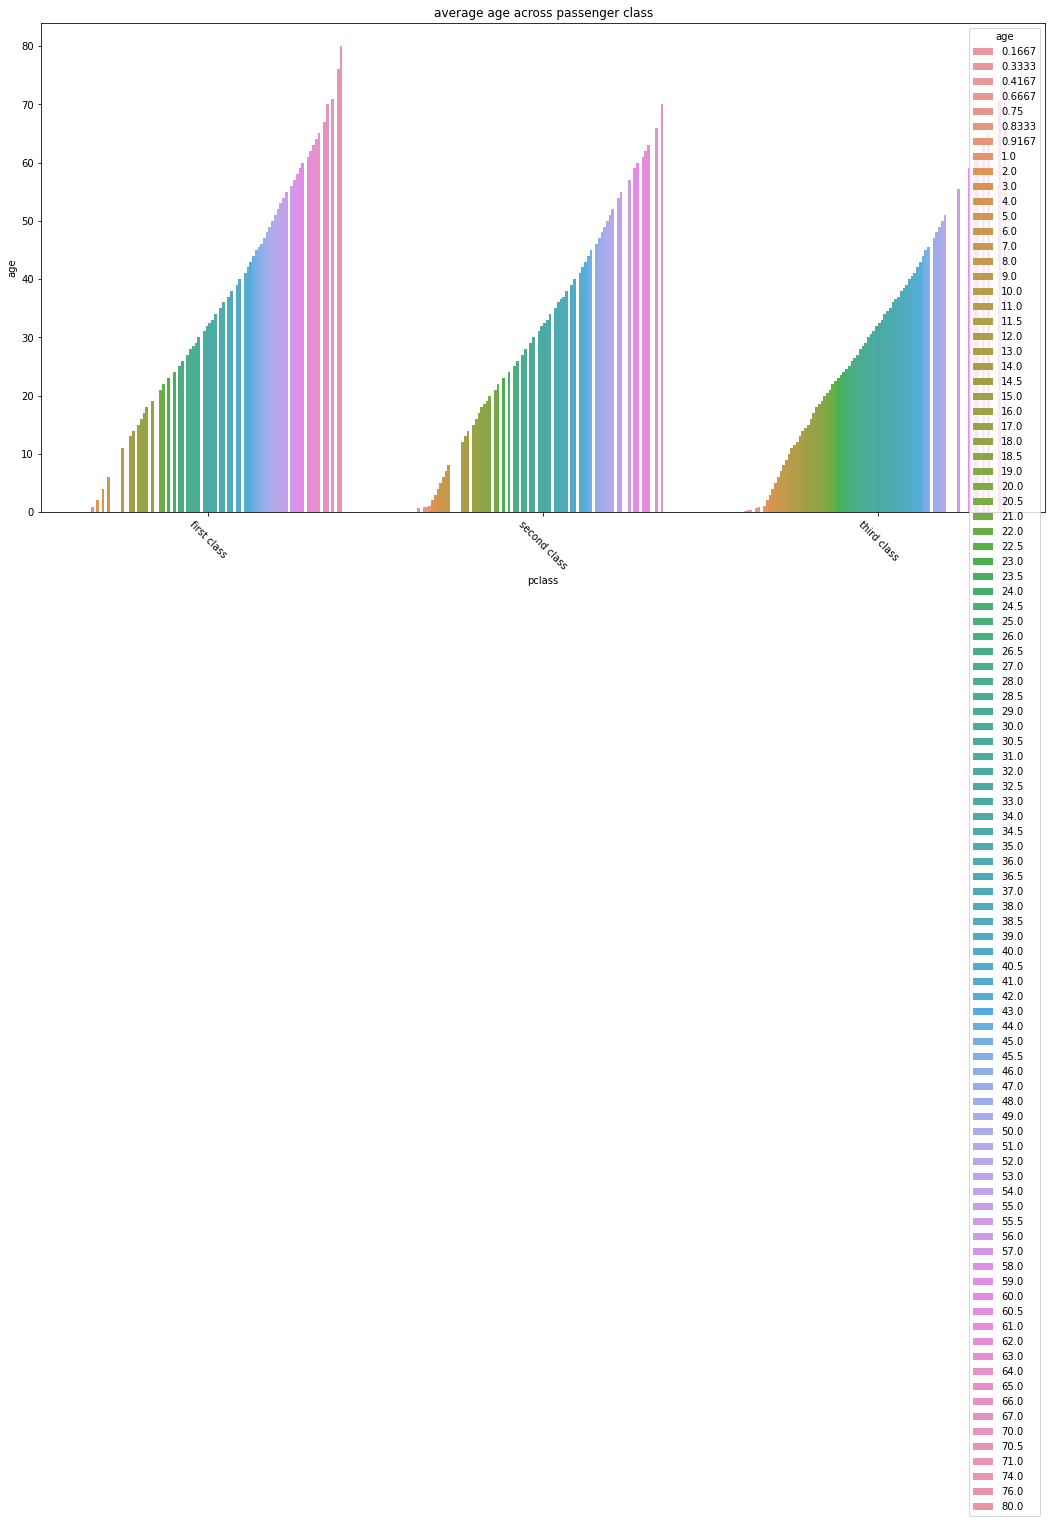

In [74]:

# DO NOT CONSIDER THIS : 

      #>> display when we put "age" as hue instead of "pclass" 

# Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?

plt.figure(figsize=(18,9))
sns.barplot(data = tt, x = "pclass", y = "age", hue = "age", ci = None)
plt.xticks(rotation = -45)
plt.title('average age across passenger class')

    #>>> The first class has the oldest passengers

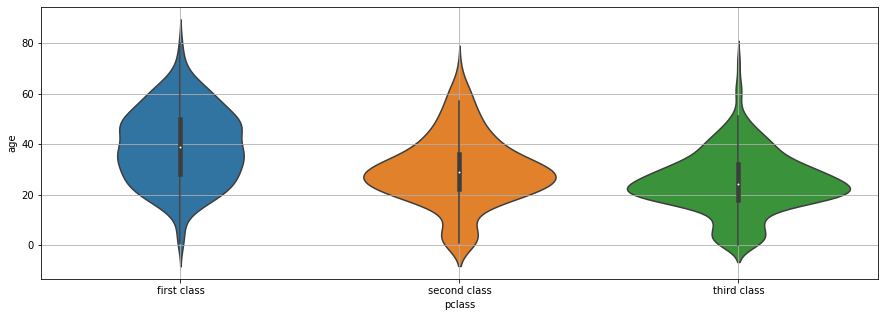

In [75]:
# Create a violin plot to show the distribution of age across passenger class.


plt.figure(figsize=(15,5))
sns.violinplot(x = tt["pclass"], y = tt["age"])
plt.grid()
